In [38]:
import pandas as pd
from top2vec import Top2Vec
from ast import literal_eval
from tqdm import tqdm
from nltk import word_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument 
from scipy.spatial.distance import cosine


In [2]:
# first=pd.read_csv('/Volumes/T7/chroniclingamerica/american-stories/keywords/kkk-first-label.csv')
# between=pd.read_csv('/Volumes/T7/chroniclingamerica/american-stories/keywords/kkk-between-label.csv')
second=pd.read_csv('/Volumes/T7/chroniclingamerica/american-stories/keywords/kkk-second-label-lemma.csv', converters={'token':literal_eval})

In [50]:
second=second.sort_values(by='date')

In [51]:
data=second['lemma']
len(data)

46613

In [52]:
tagged_data = [TaggedDocument(words=word_tokenize(doc.lower()), tags=[str(i)]) for i, doc in enumerate(data)]

In [53]:
model = Doc2Vec(vector_size=300, min_count=1, epochs=50)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)
#7m 20s

In [54]:
# get the document vectors
document_vectors = [model.infer_vector(word_tokenize(doc.lower())) for doc in data]
#14m 58s

In [55]:
len(document_vectors)

46613

In [56]:
cosine_sim=[]
for idx, val in enumerate(document_vectors):
    if idx==0:
        continue
    else: 
        cosine_sim.append(cosine(val, document_vectors[idx-1]))

In [57]:
len(cosine_sim)

46612

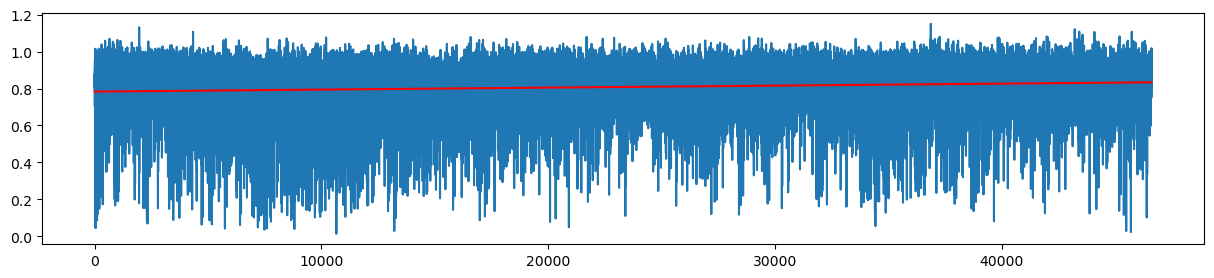

In [66]:
import matplotlib.pyplot as plt
import numpy as np
x=range(0,46612)
y=cosine_sim
plt.figure(figsize=(15,3))
plt.plot(cosine_sim)
slope, intercept = np.polyfit(x, y, 1)
trendline = slope * np.array(x) + intercept
plt.plot(x, trendline, label='Trend Line', color='red')
plt.show()

In [71]:
import umap
from sklearn.datasets import load_digits

# digits = load_digits()

embedding = umap.UMAP().fit_transform(document_vectors)

In [89]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(embedding.data)

In [102]:
label_to_color = {'neither': 'grey', 'aa': 'red', 'ws': 'blue'}
# Function to map labels to colors
def map_labels_to_colors(label):
    return label_to_color.get(label, 'unknown')  # Default to 'unknown' if label not found

# Create the 'color' column
second['color'] = second['label'].apply(map_labels_to_colors)

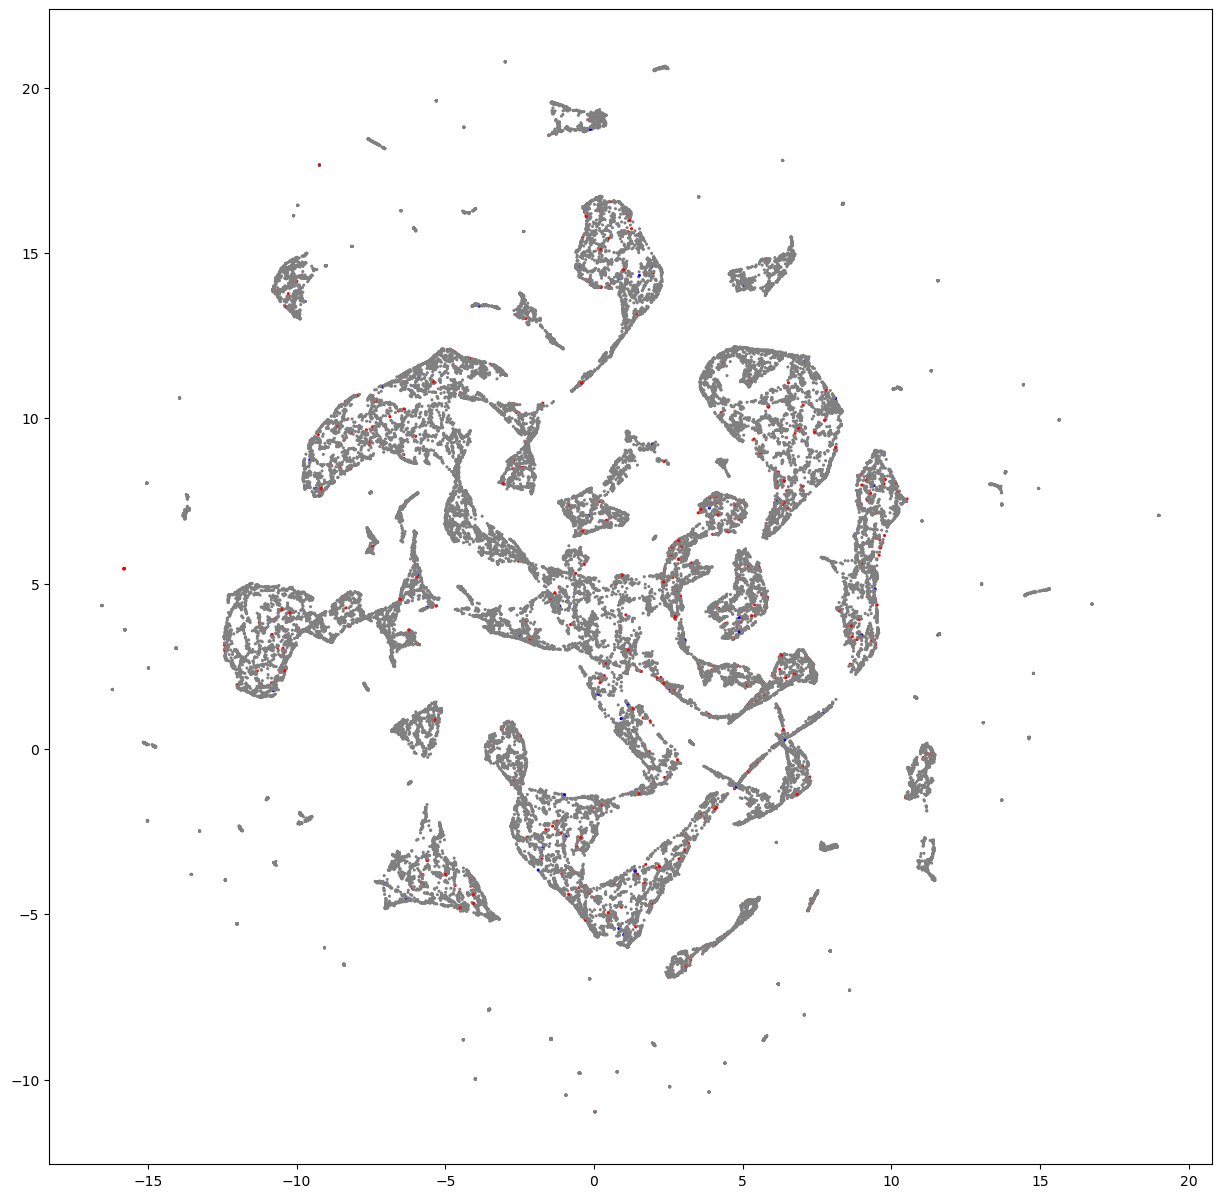

In [109]:
plt.figure(figsize=(15,15))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1], s=1.5, c=second['color'])